# **Melbourne Housing Dataset**

## **Dataset Glossary** **bold text**:
The detailed data dictionary is given below:

|Column|Description|
|---|---|
|Suburb|Suburb in which the property is located|
|Rooms|Number of rooms in the property|
|Type|Type of the property like h: house,cottage,villa, semi,terracet t:townhouse u:unit, duplex|
|SellerG|Name of the real estate agent who sold the property|
|Date|Date on which the property was sold|
|Distance|Distance of the property from CBD in kilometres. CBD is the central business district of the city.|
|Postcode|Postcode of the area|
|Bedroom|Number of bedrooms in the property|
|Bathroom|Number of bathrooms in the property|
|Car|Number of car parking spaces in the property|
|Landsize|Size of the land in square metres|
|BuildingArea|Size of the building in square metres (Generally, building size is smaller than land size since someone can have personal gardens and other things in the property.)|
|YearBuilt|Year in which the building was built|
|Regionname|Name of the region in which the property is located like Eastern Metropolitan, Western Metropolitan, Northern Victoria etc.|
|Propertycount|Number of properties that are present in the suburb|
|Price|price (in AUD) at which the property was sold|


## **Import Libraries and Dataset**

### Import Necessary Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Import The Dataset

In [2]:
#import data as a pandas dataframe

# Access the .csv file in Google Drive folder. The file path must be correct
data = pd.read_csv('Melbourne_Housing.csv')

## **Data Check**

### ***View First And Last Five Rows Of Dataset***


- Give the data a glance to understand dataset
- Check to see if there any weird/unusual data

In [3]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [4]:
data.tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
27109,Noble Park,3,h,C21,30-09-2017,22.700,3174.000,3.000,1.000,6.000,569.000,130,1959.000,South-Eastern Metropolitan,11806,627500
27110,Reservoir,3,u,RW,30-09-2017,12.000,3073.000,3.000,1.000,1.000,NaN,105,1990.000,Northern Metropolitan,21650,475000
27111,Roxburgh Park,4,h,Raine,30-09-2017,20.600,3064.000,4.000,2.000,2.000,NaN,225,1995.000,Northern Metropolitan,5833,591000
27112,Springvale South,3,h,Harcourts,30-09-2017,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500
27113,Westmeadows,4,h,Barry,30-09-2017,16.500,3049.000,4.000,2.000,6.000,813.000,140,1960.000,Northern Metropolitan,2474,791000


### ***View Shape Of Dataset***

The shape of the data set is the number of rows(entries) and columns(fields- data on the entries)

In [5]:
data.shape

(27114, 16)

27114 entries
16 fields

### ***Check the data types of the columns for the dataset***


- Check the data types for each column and see if they make sense.
- Are numerical values stored as strings?
- Are dates and time values stored as strings?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


- date field needs to be converted into a date time format
- buidingarea to an int or float

Fields with missing values:
- bedroom
- bathroom
- buildingarea
- yearbuilt

### ***Change The Data Type Of The Date Column***

In [7]:
data["Date"]= pd.to_datetime(data["Date"], format = '%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

***Determine The Reason For BuildingArea Being A String And Convert To Numerical Value***

In [8]:
# let's see why BuildingArea column has object data type
data["BuildingArea"].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [9]:
# checking the count of different data types in BuildingArea column
data["BuildingArea"].apply(type).value_counts()

BuildingArea
<class 'float'>    16571
<class 'str'>      10543
Name: count, dtype: int64

In [10]:
# replacing values with nan
data["BuildingArea"] = data["BuildingArea"].replace(["missing", "inf"], np.nan)

# changing the data type to float
data["BuildingArea"] = data["BuildingArea"].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

### ***Check For Missing Values***


- Missing values occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

In [11]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

### ***Checking for duplicate entries in the data***

In [12]:
# check for duplicate entries
data.duplicated().sum()

11

there are 11 dupes

In [13]:
# dropping duplicate entries from the data
data.drop_duplicates(inplace= True)

# resetting the index of data frame since some rows will be removed
data.reset_index(drop= True, inplace= True)

### ***Check the statistical summary of the data.***

In [14]:
# call a statistical summary of the data
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.000,2.992,1.000,2.000,3.000,4.000,16.000,0.955
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.000,11.280,0.000,6.400,10.500,14.000,48.100,6.784
Postcode,27102.000,3113.787,3000.000,3046.000,3088.000,3153.000,3978.000,111.129
Bedroom,20678.000,3.046,0.000,2.000,3.000,4.000,20.000,0.955
Bathroom,20672.000,1.592,0.000,1.000,1.000,2.000,9.000,0.701
Car,20297.000,1.716,0.000,1.000,2.000,2.000,18.000,0.994
Landsize,17873.000,560.537,50.000,220.000,513.000,664.000,76000.000,1411.309
BuildingArea,10529.000,154.512,11.000,101.000,133.000,183.000,6791.000,130.584
YearBuilt,11985.000,1966.618,1850.000,1950.000,1970.000,2000.000,2019.000,36.042


# ***FAST AND DIRTY PANDAS TUTORIAL***
### Resources:
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [TutsWiki](https://tutswiki.com/pandas-cookbook/chapter2/) - I learned Pandas from this site.
- [Tutorialspoint](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm)

## **Selecting Rows and Columns**

### Selecting Rows


- similar to slicing Python lists.
- Format: dataframe[ start_index : stop_index]

In [15]:
# select rows
data[10:15]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
10,Ascot Vale,2,u,Nelson,2016-09-03,5.900,3032.000,3.000,1.000,2.000,50.000,NaN,NaN,Western Metropolitan,6567,455000
11,Ashburton,4,h,Marshall,2016-09-03,11.000,3147.000,4.000,3.000,2.000,753.000,399.000,2015.000,Southern Metropolitan,3052,2650000
12,Ashburton,2,h,Marshall,2016-09-03,11.000,3147.000,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000
13,Ashwood,2,h,Tim,2016-09-03,12.200,3147.000,2.000,1.000,1.000,583.000,NaN,1950.000,Southern Metropolitan,2894,995000
14,Avondale Heights,4,h,Jellis,2016-09-03,10.500,3034.000,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000


### Selecting Columns


- dataframe[column_name]

In [16]:
# select columns
data["Distance"]

0       13.500
1        3.300
2        3.300
3        6.400
4        6.400
         ...  
27098   22.700
27099   12.000
27100   20.600
27101   22.200
27102   16.500
Name: Distance, Length: 27103, dtype: float64

### **loc Method**


- loc is a method to access rows and columns on pandas objects. When using the loc method on a dataframe, we specify which rows and which columns we want by using the following format:

    dataframe.loc[row selection, column selection]
- DataFrame.loc[] method is a method that takes only index labels and returns row or dataframe if the index label exists in the data frame.

<br></br>
Accessing selected rows and columns using loc method

In [17]:
# Selecting specific columns for select rows
data.loc[[1,2,192], ["Bedroom", "Bathroom", "BuildingArea", "Price"]]

,Bedroom,Bathroom,BuildingArea,Price
1,2.000,1.000,82.000,1275000
2,2.000,1.000,NaN,1455000
192,2.000,1.000,73.000,781000


In [18]:
# Selecting specific columns for a range of rows
data.loc[[x for x in range(0,len(data))], ["Bedroom", "Bathroom", "BuildingArea", "Price"]]

,Bedroom,Bathroom,BuildingArea,Price
0,3.000,2.000,225.000,840000
1,2.000,1.000,82.000,1275000
2,2.000,1.000,NaN,1455000
3,3.000,2.000,263.000,2000000
4,3.000,2.000,NaN,1110000
...,...,...,...,...
27098,3.000,1.000,130.000,627500
27099,3.000,1.000,105.000,475000
27100,4.000,2.000,225.000,591000
27101,3.000,2.000,NaN,780500


### **iloc Method**



- The iloc indexer for Pandas Dataframe is used for integer location-based indexing/selection by position. When using the loc method on a dataframe, we specify which rows and which columns we want by using the following format:

  dataframe.iloc[row selection, column selection]

<br></br>
Accessing selected rows and columns using iloc method

In [19]:
# access selected rows and columns using iloc
data.iloc[[x for x in range(0,10)], [5,3,1,6]]

,Distance,SellerG,Rooms,Postcode
0,13.500,Nelson,3,3042.000
1,3.300,hockingstuart,2,3206.000
2,3.300,Thomson,2,3206.000
3,6.400,Brace,4,3078.000
4,6.400,Jellis,3,3078.000
5,13.800,Greg,3,3018.000
6,11.100,FN,5,3025.000
7,11.100,Jas,3,3025.000
8,11.100,hockingstuart,4,3025.000
9,6.300,Jellis,2,3143.000


## **groupby()**


- Pandas dataframe.groupby() function is used to split the data into groups based on some criteria. The format:
  - dataframe.groupby([columns to be grouped])
- [Good .groupby() Tutorial](https://www.youtube.com/watch?v=ipoSjrN0oh0&t=310s)


Group by a single column

In [20]:
# use groupby to get the mean 
data.groupby(["Suburb"])["Price"].mean()

Suburb
Abbotsford     1033549.020
Aberfeldie     1307192.857
Airport West    751364.245
Albanvale       536055.556
Albert Park    1927650.538
                   ...    
Yallambie       817017.045
Yarra Glen      620000.000
Yarraville      992585.657
croydon         730000.000
viewbank        885000.000
Name: Price, Length: 345, dtype: float64

Group by multiple columns

In [21]:
# use groupby to get mean for multiple columns
data.groupby(["Suburb", "Bedroom", "Bathroom"], as_index=False)["Price"].median()

,Suburb,Bedroom,Bathroom,Price
0,Abbotsford,1.000,1.000,433500.000
1,Abbotsford,2.000,1.000,1035000.000
2,Abbotsford,2.000,2.000,870000.000
3,Abbotsford,3.000,1.000,1295000.000
4,Abbotsford,3.000,2.000,1180000.000
...,...,...,...,...
2478,Yarraville,4.000,1.000,1174000.000
2479,Yarraville,4.000,2.000,1330000.000
2480,Yarraville,4.000,3.000,1663500.000
2481,Yarraville,5.000,2.000,1551000.000


Apply multiple functions to a group

In [22]:
# use groupby to apply multiple functions to a column
data.groupby(["Suburb", "Bedroom", "Bathroom"], as_index=False)["Price"].agg(['mean','median'])

,Suburb,Bedroom,Bathroom,mean,median
0,Abbotsford,1.000,1.000,418166.667,433500.000
1,Abbotsford,2.000,1.000,1026060.000,1035000.000
2,Abbotsford,2.000,2.000,918285.714,870000.000
3,Abbotsford,3.000,1.000,1285656.250,1295000.000
4,Abbotsford,3.000,2.000,1171500.000,1180000.000
...,...,...,...,...,...
2478,Yarraville,4.000,1.000,1182107.143,1174000.000
2479,Yarraville,4.000,2.000,1325750.000,1330000.000
2480,Yarraville,4.000,3.000,1663500.000,1663500.000
2481,Yarraville,5.000,2.000,1593000.000,1551000.000


## **Creating A New Column In A Dataset**

Format **dataframe[ "name_of_new_column" ] = new_value**

In [23]:
# create a new column
data["Bedroom:Bathroom"] = data["Bedroom"] / data["Bathroom"]
data

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Bedroom:Bathroom
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,840000,1.500
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,2.000
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,2.000
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,1.500
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3.000,1.000,6.000,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,627500,3.000
27099,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3.000,1.000,1.000,NaN,105.000,1990.000,Northern Metropolitan,21650,475000,3.000
27100,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4.000,2.000,2.000,NaN,225.000,1995.000,Northern Metropolitan,5833,591000,2.000
27101,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500,1.500


## **Math and Statistical Functions**

### min()



min() - to check the minimum value of a numeric column

In [24]:
# calculate the minimum value for a column
data["Price"].min()


85000

### max()

max() - to check the maximum value of a numeric column

In [25]:
# calculate the maximum value for a column
data["Price"].max()


11200000

### mean()

mean() - to check the mean (average) value of the column

In [26]:
# calculate the mean for a column
data["Price"].mean()

1050664.1311293952

### median()

median() - to check the median value of the column

In [27]:
# calculate the median for a column
data["Price"].median()


871000.0

### mode()

mode() - to check the mode value of the column

In [28]:
# calculate mode
data["Price"].mode()


0    1100000
Name: Price, dtype: int64

### value_counts()

value_counts() - to check the number of values that each unique quantity has in a column

In [29]:
# value counts
data["Suburb"].value_counts()


Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: count, Length: 345, dtype: int64

value_counts(normalize=True) - using the normalize parameter and initializing it to True will return the relative frequencies of the unique values.

In [30]:
# express values a percentage of the whole
data["Suburb"].value_counts(normalize=True)


Suburb
Reservoir        0.027
Bentleigh East   0.018
Richmond         0.016
Preston          0.015
Brunswick        0.014
                  ... 
Wandin North     0.000
Ferny Creek      0.000
Tecoma           0.000
Montrose         0.000
viewbank         0.000
Name: proportion, Length: 345, dtype: float64

In [31]:
data.groupby(["Suburb",])["Bedroom"].value_counts()

Suburb      Bedroom
Abbotsford  2.000      32
            3.000      31
            1.000       6
            4.000       4
Aberfeldie  3.000      22
                       ..
Yarraville  2.000      64
            4.000      36
            1.000       5
            5.000       4
            6.000       1
Name: count, Length: 1304, dtype: int64

### sum()

sum() - adds up all the values in the column

In [32]:
# sum


### Adding, Subtracting, Multiplying and Dividing Columns by a Value

**Add A Value To A Column**

In [33]:
# add value to all values in a column
data["Price"] = data["Price"] + 1000

**Subtracting A Value From A Column**

In [34]:
# subtract a value from all values in a column

**Multiplying A Column By A Value**

In [35]:
# multiply all values in a column by a value

**Dividing A Column By A Value**

In [36]:
# divide all values in a column by a value

### Adding, Subtracting, Multiplying and Dividing Columns By Other Columns

In [37]:
data[data["Landsize"] > 200]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Bedroom:Bathroom
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,841000,1.500
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2001000,1.500
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1111000,1.500
5,Altona,3,h,Greg,2016-09-03,13.800,3018.000,3.000,2.000,1.000,352.000,242.000,2015.000,Western Metropolitan,5301,521000,1.500
6,Altona North,5,h,FN,2016-09-03,11.100,3025.000,5.000,3.000,6.000,592.000,251.000,1965.000,Western Metropolitan,5132,1086000,1.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27093,Keysborough,3,h,Area,2017-09-30,25.200,3173.000,3.000,1.000,1.000,539.000,126.000,1969.000,South-Eastern Metropolitan,8459,772000,3.000
27095,Maidstone,2,h,Biggin,2017-09-30,6.400,3012.000,2.000,1.000,1.000,300.000,108.000,1950.000,Western Metropolitan,3873,612500,2.000
27098,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3.000,1.000,6.000,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,628500,3.000
27101,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,781500,1.500


# **Exploratory Data Analysis**

## Histograms and Boxplots

**Understanding Normal Distribution**

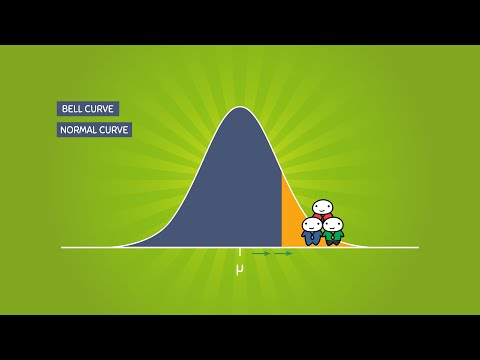

In [38]:
from IPython.display import YouTubeVideo
YouTubeVideo('mtbJbDwqWLE')

**Understanding Boxplots**

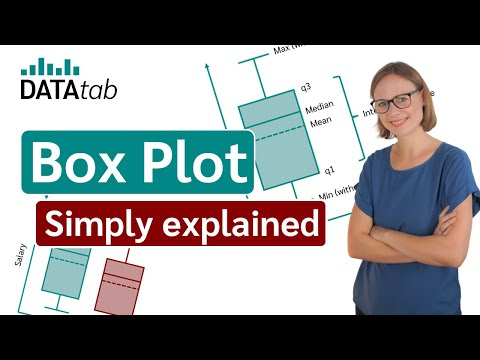

In [39]:
from IPython.display import YouTubeVideo
YouTubeVideo('INSIyaZUXIY')

### Histogram

- A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.
- The vertical y-axis represents the number count or percentage of occurrences in the data for each column
- Columns can be used to visualize patterns of data distributions.


<br></br>
Histogram For One Column

<Axes: xlabel='Distance', ylabel='Density'>

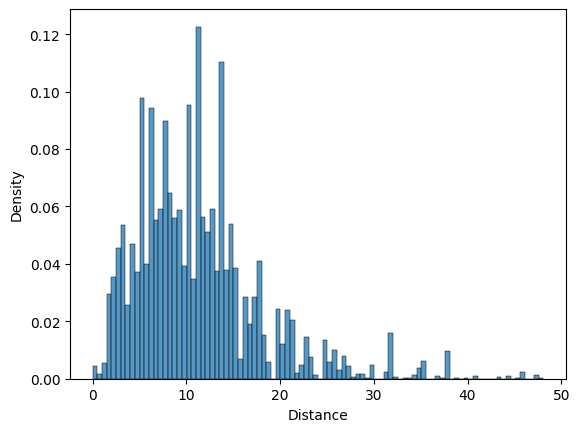

In [40]:
sns.histplot(data=data, x= "Distance", stat = "density")

Histogram For Multiple Columns

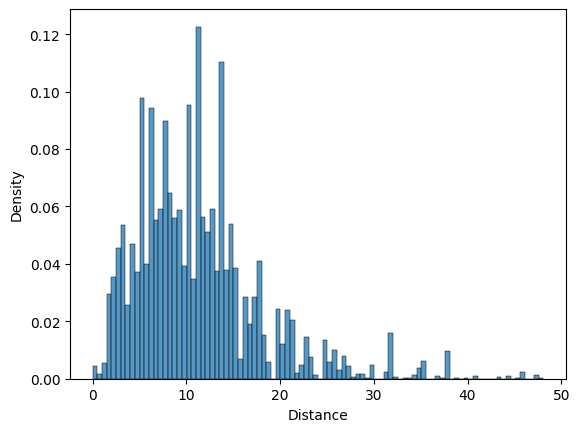

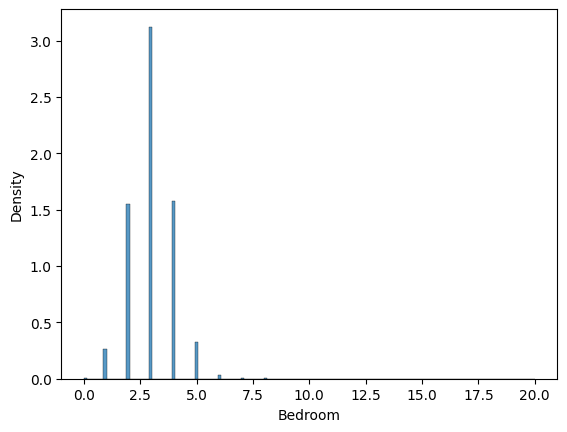

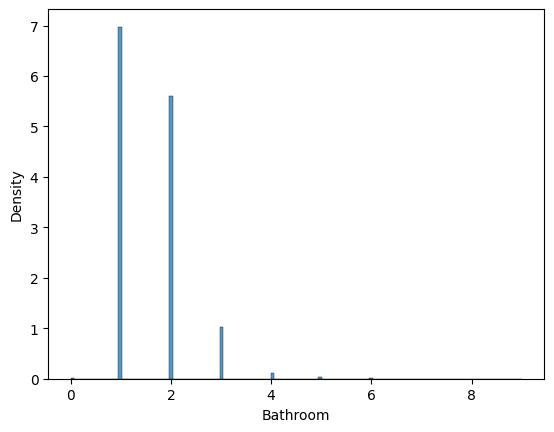

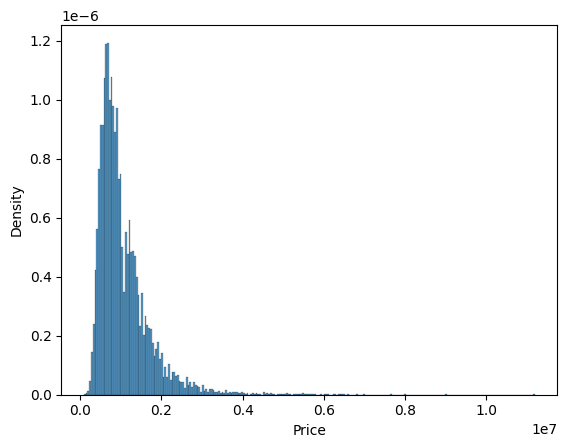

In [41]:
for field in ["Distance","Bedroom","Bathroom","Price"]:
    sns.histplot(data=data, x = field, stat ='density')
    plt.show()

In [42]:
data["Distance"].describe()

count   27102.000
mean       11.280
std         6.784
min         0.000
25%         6.400
50%        10.500
75%        14.000
max        48.100
Name: Distance, dtype: float64

### **Boxplot**

- A box and whisker plot—also called a box plot—displays the five-number summary of a set of data.
- The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
- In a box plot, a box runs from the first quartile to the third quartile.
- A vertical line goes through the box at the median.
- The whiskers go from each quartile to the minimum or maximum.
- The whiskers are set at 1.5 times the interquartile range from the lower or upper quartile

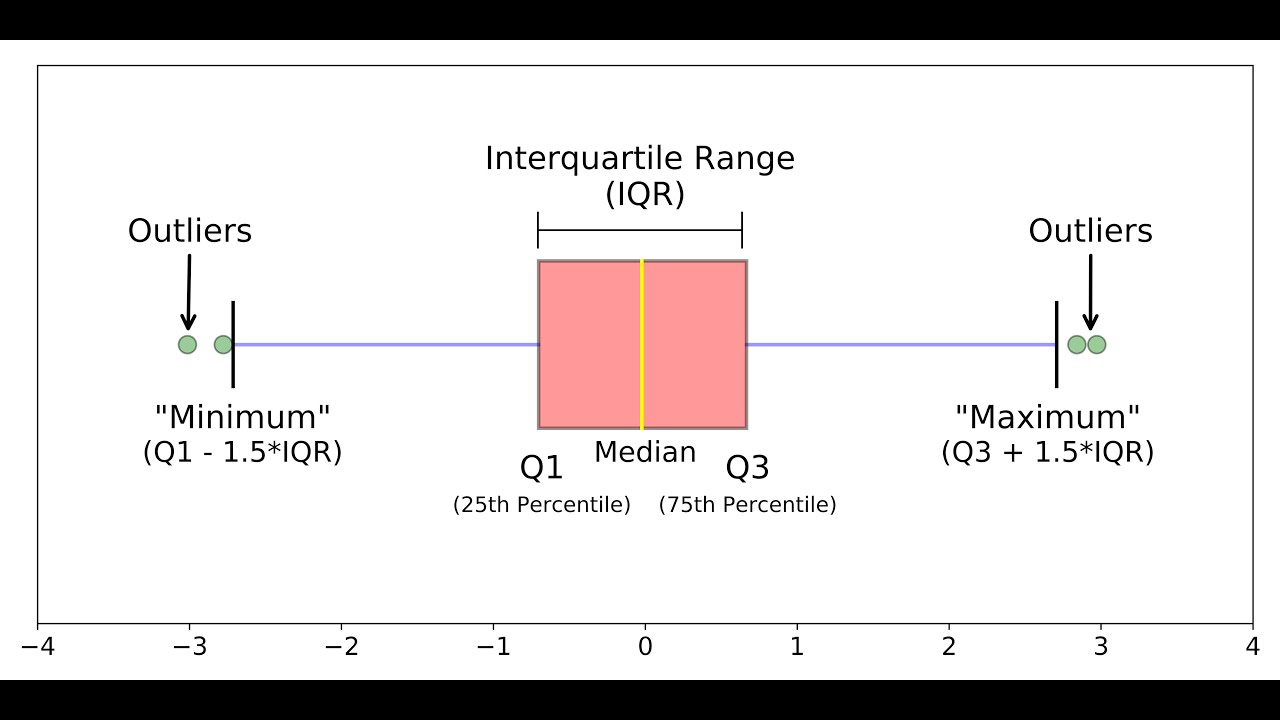

<Axes: xlabel='Price'>

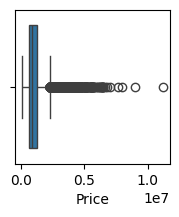

In [43]:
plt.figure(figsize = (2,2))
sns.boxplot(data=data, x = "Price")

<Axes: xlabel='Bedroom'>

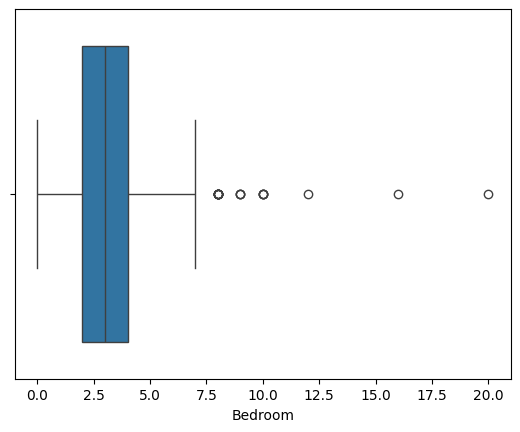

In [44]:
sns.boxplot(data= data, x = 'Bedroom')

In [45]:
data[data["Bedroom"] >8]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Bedroom:Bathroom
1133,Caulfield East,3,h,Woodards,2016-08-06,9.300,3145.000,20.000,1.000,2.000,875.000,NaN,NaN,Southern Metropolitan,608,1651000,20.000
2012,Ashburton,8,h,hockingstuart,2016-09-10,11.000,3147.000,9.000,7.000,4.000,1472.000,618.000,2009.000,Southern Metropolitan,3052,2951000,1.286
7986,Melton,12,h,PRDNationwide,2017-11-11,31.700,3337.000,12.000,5.000,3.000,960.000,223.000,1970.000,Western Victoria,3600,711000,2.400
8168,Vermont South,4,h,Buxton,2017-11-11,17.200,3133.000,10.000,6.000,7.000,650.000,NaN,NaN,Eastern Metropolitan,4280,1601000,1.667
8169,Vermont South,3,h,Buxton,2017-11-11,17.200,3133.000,10.000,6.000,7.000,648.000,NaN,NaN,Eastern Metropolitan,4280,1601000,1.667
11753,Bundoora,10,h,Ray,2017-07-15,12.100,3083.000,10.000,3.000,2.000,313.000,NaN,2006.000,Northern Metropolitan,10175,901000,3.333
15305,Fawkner,3,h,Stockdale,2016-09-17,12.400,3060.000,9.000,6.000,2.000,592.000,103.000,1960.000,Northern Metropolitan,5070,752000,1.500
18708,Preston,4,h,Barry,2016-05-22,8.800,3072.000,9.000,8.000,7.000,1254.000,280.000,1928.000,Northern Metropolitan,14577,761000,1.125
25529,Burwood,10,h,Buxton,2017-10-28,10.400,3125.000,10.000,9.000,2.000,612.000,466.000,2015.000,Southern Metropolitan,5678,2316000,1.111
25916,Mitcham,16,h,Buxton,2017-10-28,17.200,3132.000,16.000,8.000,8.000,NaN,NaN,NaN,Eastern Metropolitan,6871,5001000,2.000


### Bar Graph




- A bar graph is generally used to show the counts of observations in each bin (or level or group) of categorical variable using bars.
- We can use the *countplot()* function of seaborn to plot a bar graph.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Western Metropolitan'),
  Text(1, 0, 'Southern Metropolitan'),
  Text(2, 0, 'Northern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

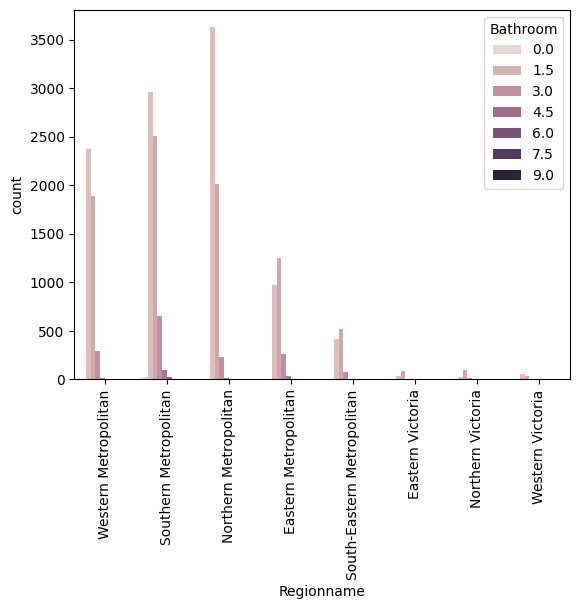

In [46]:
sns.countplot(data=data, x="Regionname", hue = "Bathroom")
plt.xticks(rotation= 90)

### Scatterplot



Sometimes we want to know if two variables mean something when put together, whether a small change in one variable affects the other variable. In such cases, plotting a **scatterplot**, or **scatter-diagram**, with our data points can help us to check whether there is a potential relationship between them.

- It takes two perpendicular axes of coordinates, one for x and one for y.
- Unlike the lineplot, it directly plots each pair of values as a point on the 2D space.
- The *scatterplot()* function of seaborn can be used to make a scatterplot.

<Axes: xlabel='Distance', ylabel='Price'>

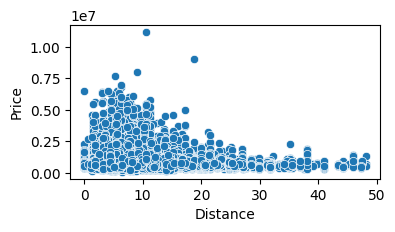

In [47]:
plt.figure(figsize = (4,2))
sns.scatterplot(data=data, x = 'Distance', y = "Price")

<Axes: xlabel='Rooms', ylabel='Price'>

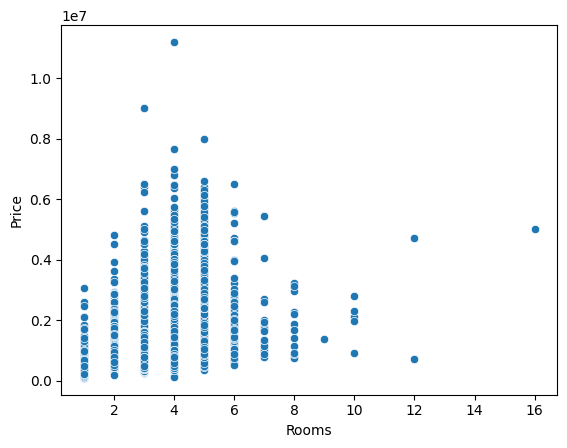

In [48]:
sns.scatterplot(data=data, x = 'Rooms', y= "Price")

### lmplot


The lmplot() function plots a scatterplot and also fit a linear model with a confidence interval for the fitted model.

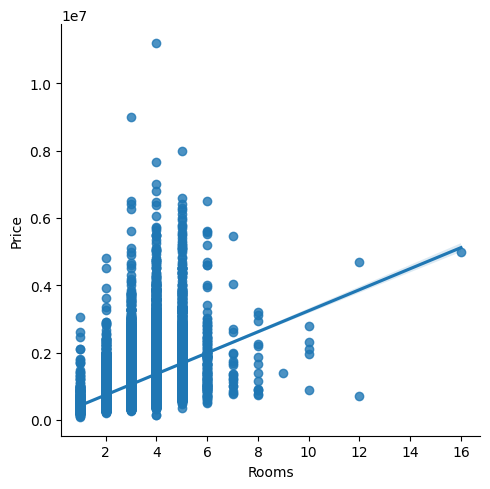

In [49]:
sns.lmplot(data=data, x = 'Rooms', y = 'Price')

### Heatmap


A heatmap is a graphical representation of data as a color-encoded matrix.
It is a great way of representing the correlation for each pair of columns in the data.
The heatmap() function of seaborn helps us to create such a plot.

<Axes: >

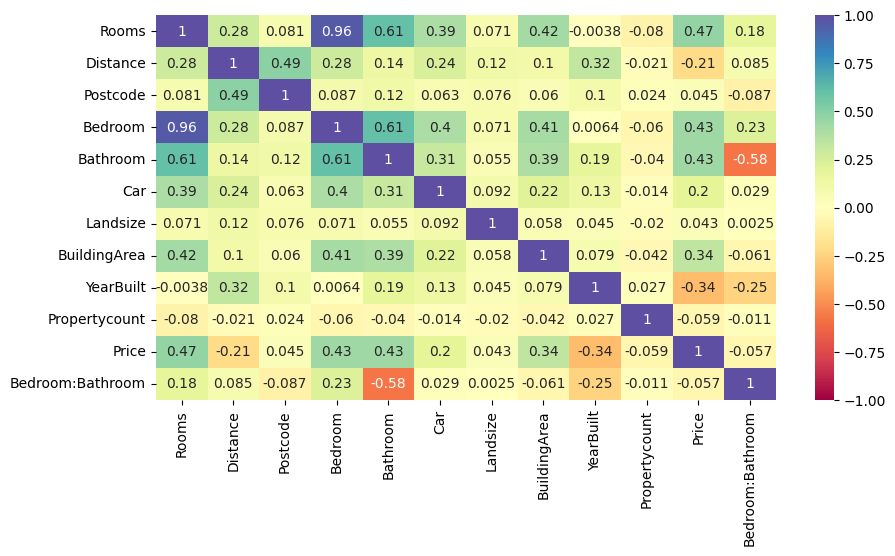

In [50]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_columns = data.select_dtypes(include=numerics)
plt.figure(figsize = (10,5))
sns.heatmap(numerical_columns.corr(), annot= True, cmap = 'Spectral', vmin = -1, vmax = 1)


### Joint Kernal Density Estimate

In [51]:
data["Price"].describe()

count      27103.000
mean     1051664.131
std       641660.161
min        86000.000
25%       636000.000
50%       872000.000
75%      1301000.000
max     11201000.000
Name: Price, dtype: float64

In [52]:
# Binning Continuous Data - Price
bins = [85000, 635000, 871000, 1300000, 11200000]
labels = ["Inexpensive", "Moderately Inexpensive","Moderately Expensive","Expensive"]
data["Qualitative Cost"] = pd.cut(data["Price"], bins = bins, labels = labels)
data


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Bedroom:Bathroom,Qualitative Cost
0,Airport West,3,t,Nelson,2016-09-03,13.500,3042.000,3.000,2.000,1.000,303.000,225.000,2016.000,Western Metropolitan,3464,841000,1.500,Moderately Inexpensive
1,Albert Park,2,h,hockingstuart,2016-09-03,3.300,3206.000,2.000,1.000,0.000,120.000,82.000,1900.000,Southern Metropolitan,3280,1276000,2.000,Moderately Expensive
2,Albert Park,2,h,Thomson,2016-09-03,3.300,3206.000,2.000,1.000,0.000,159.000,NaN,NaN,Southern Metropolitan,3280,1456000,2.000,Expensive
3,Alphington,4,h,Brace,2016-09-03,6.400,3078.000,3.000,2.000,4.000,853.000,263.000,1930.000,Northern Metropolitan,2211,2001000,1.500,Expensive
4,Alphington,3,h,Jellis,2016-09-03,6.400,3078.000,3.000,2.000,2.000,208.000,NaN,2013.000,Northern Metropolitan,2211,1111000,1.500,Moderately Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,Noble Park,3,h,C21,2017-09-30,22.700,3174.000,3.000,1.000,6.000,569.000,130.000,1959.000,South-Eastern Metropolitan,11806,628500,3.000,Inexpensive
27099,Reservoir,3,u,RW,2017-09-30,12.000,3073.000,3.000,1.000,1.000,NaN,105.000,1990.000,Northern Metropolitan,21650,476000,3.000,Inexpensive
27100,Roxburgh Park,4,h,Raine,2017-09-30,20.600,3064.000,4.000,2.000,2.000,NaN,225.000,1995.000,Northern Metropolitan,5833,592000,2.000,Inexpensive
27101,Springvale South,3,h,Harcourts,2017-09-30,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,781500,1.500,Moderately Inexpensive


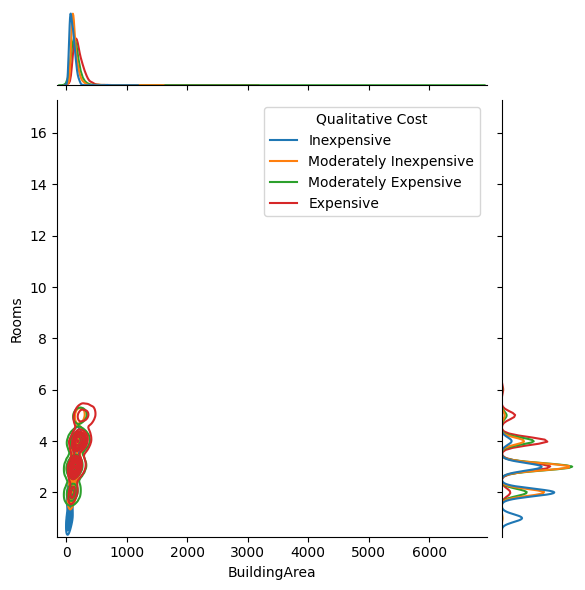

In [53]:
sns.jointplot(data= data, 
              x= "BuildingArea", 
              y = "Rooms", 
              hue = 'Qualitative Cost',
              kind = 'kde'
              )

### Plotly


Plotly is an open-source Python graphing library for building beautiful and interactive visualizations.

Import plotly library

In [54]:
# importing plotly
import plotly.express as px

## **Imputing Missing Values**

* There is no universally accepted method of dealing with missing values.
* It is often left to the discretion of the data scientist to take a decision on missing values that is whether to impute them or drop them.
* However, it is sometimes a good practice to impute the missing values rather than dropping them, because it can lead to loss of information in other features where values are present.

**How to treat missing values?**

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.
* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations.
* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.
* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.
* Other methods include k-NN, MICE, SMOTE, deep learning, ...

**Limitations of imputing missing values with central tendencies**

* When we impute the missing values with central tendencies the original distribution of the feature can get distorted.
* After imputation with the central value the variance and standard deviation of a feature can get drastically impacted.
* The impact of distortion is higher with higher percentage of missing values.

So, before directly imputing the missing values with central values of column we should investigate the missing data closely to observe the pattern of missing values, and then take a decision to impute the missing value with appropriate measure.